Both Classification and regression implementation

In [1]:
# classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df= pd.DataFrame(iris.data, columns = iris.feature_names).assign(label = iris.target)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 0)

In [9]:
type(x_train)

numpy.ndarray

In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [12]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = dtc.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [19]:
dtc.score(x_test, y_test)

1.0

In [20]:
dframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dframe[dframe['Actual'] != dframe['Predicted']]

,Actual,Predicted


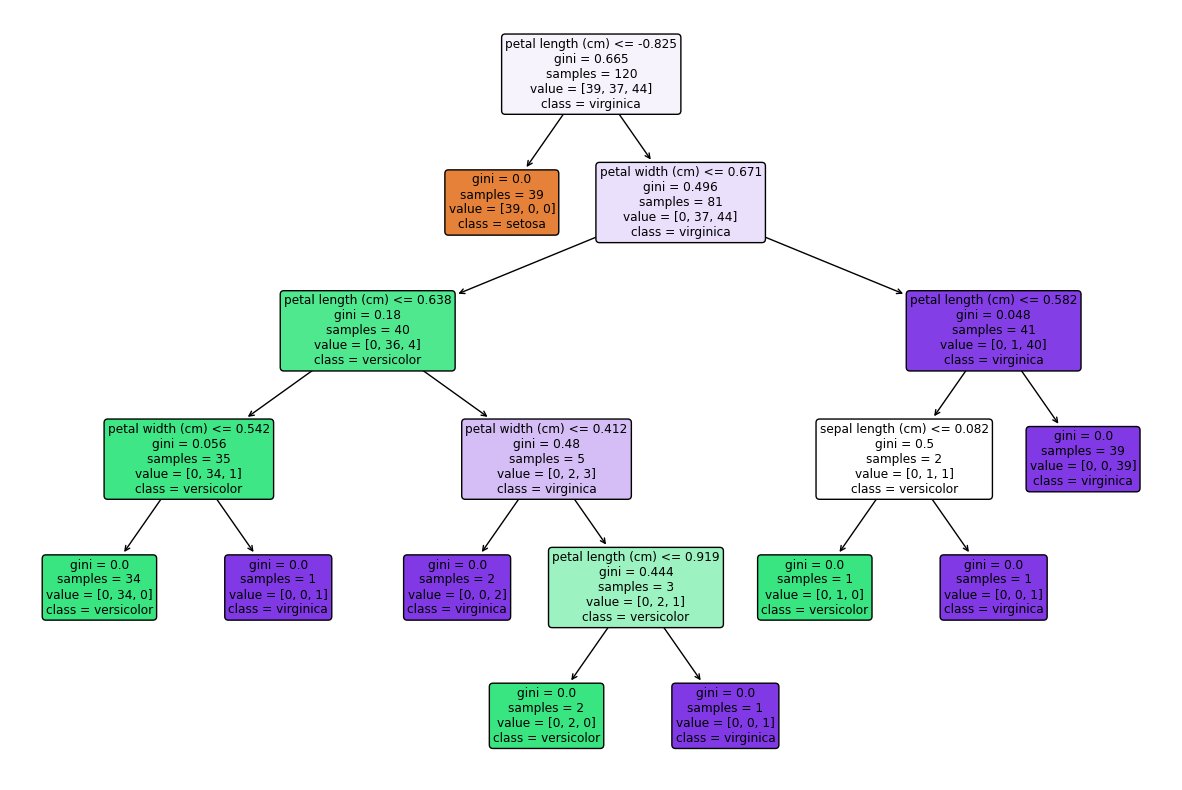

In [21]:
# plot the decision tree
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(dtc, filled = True, rounded = True, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

## Decision_Tree_Regression.ipynb

In [22]:
df = pd.read_csv('airfoil_self_noise/airfoil_self_noise.dat', sep='\t', header=None)


In [23]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [24]:
df.describe()

,0,1,2,3,4,5
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [25]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [26]:
x.head()

,0,1,2,3,4
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler    
std = StandardScaler()

In [30]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [32]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
y_pred = dtr.predict(x_test)

In [34]:
type(y_pred)

numpy.ndarray

In [35]:
dtr.score(x_test, y_test)

0.8739443641915312

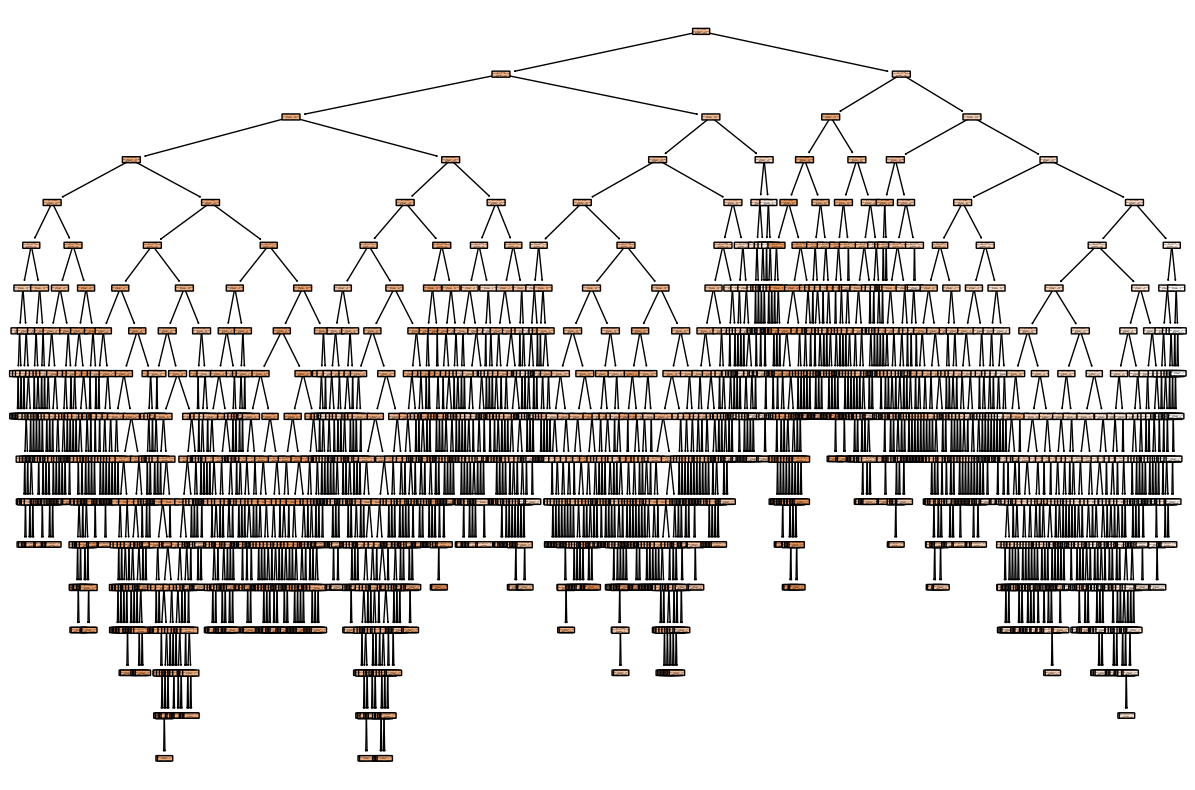

In [36]:
# graphviz
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(dtr, filled = True, rounded = True, feature_names = df.columns)
plt.show()


Study:
<!-- change line --> 
        Log Loss
        Gini Impurity
        Entropy
        Information Gain